<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab7/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №7 по вычислительной математике

Державин Андрей, Б01-909

## Задача X.9.3

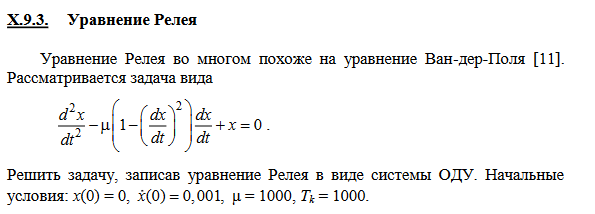

In [ ]:
import numpy as np
from matplotlib import pyplot as plt